In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pop=np.loadtxt("populations.txt")
years=np.array(pop[:,0],dtype="int")
hares=pop[:,1]
lynxes=pop[:,2]
carrots=pop[:,3]

Plot the populations for the years in the period. Add legend and axis labels to the plot.

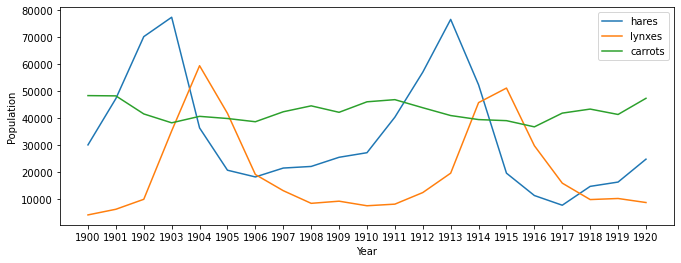

In [3]:
plt.figure().set_figwidth(11)
plt.plot(years, hares, label="hares")
plt.plot(years, lynxes, label="lynxes")
plt.plot(years, carrots, label="carrots")
plt.xticks(np.arange(years[0], years[-1]+1, step=1))
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.show()

Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for the years in the period.

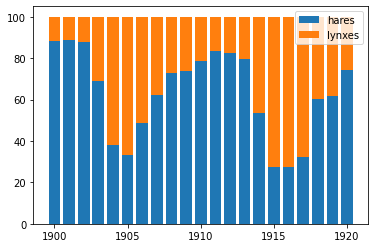

In [4]:
plt.bar(years,100*hares/(hares+lynxes), label="hares")
plt.bar(years,100*lynxes/(hares+lynxes), bottom=100*hares/(hares+lynxes), label="lynxes")
plt.legend()
plt.show()

Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Arrange 3 subplots in a row.

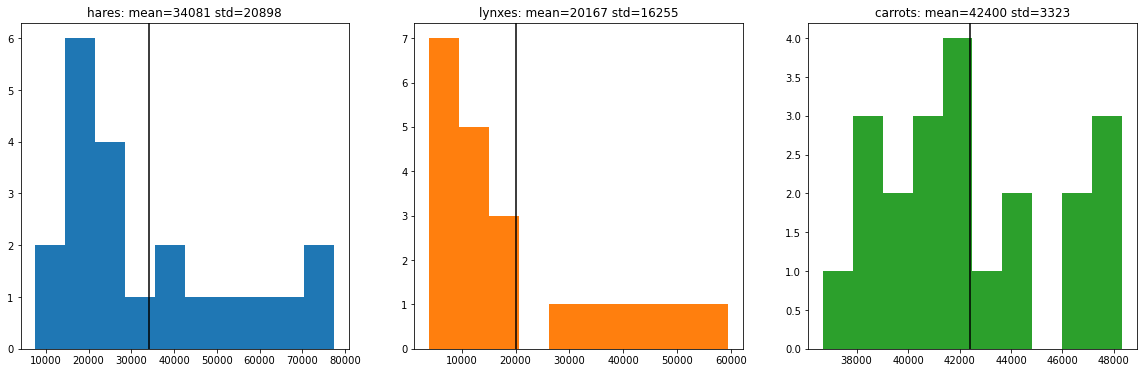

In [5]:
hstd=np.std(hares)
hmean=np.mean(hares)
lstd=np.std(lynxes)
lmean=np.mean(lynxes)
cstd=np.std(carrots)
cmean=np.mean(carrots)
f,ax=plt.subplots(1,3,figsize=(20,6))
ax[0].hist(hares)
ax[0].axvline(x=hmean, color='black')
ax[0].set_title("hares: mean="+format(hmean, '.0f')+" std="+format(hstd, '.0f'))
ax[1].hist(lynxes, color='C1')
ax[1].axvline(x=lmean, color='black')
ax[1].set_title("lynxes: mean="+format(lmean, '.0f')+" std="+format(lstd, '.0f'))
ax[2].hist(carrots, color='C2')
ax[2].axvline(x=cmean, color='black')
ax[2].set_title("carrots: mean="+format(cmean, '.0f')+" std="+format(cstd, '.0f'))
plt.show()

Find which year each species had the largest population. Mark these years in the plot of populations.

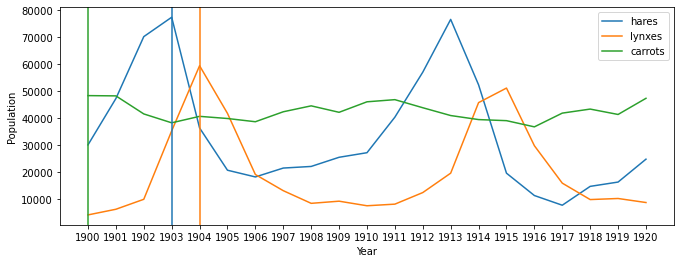

In [6]:
plt.figure().set_figwidth(11)
plt.plot(years, hares, label="hares")
plt.plot(years, lynxes, label="lynxes")
plt.plot(years, carrots, label="carrots")
plt.axvline(years[np.argmax(hares)])
plt.axvline(years[np.argmax(lynxes)],color='C1')
plt.axvline(years[np.argmax(carrots)],color='C2')
plt.xticks(np.arange(years[0], years[-1]+1, step=1))
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.show()

Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing ratio of "H" and "L" values obtained.

['H' 'H' 'H' 'H' 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'L' 'L' 'L'
 'H' 'H' 'H']


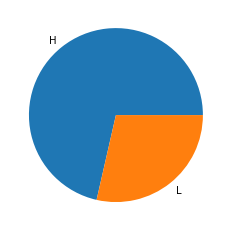

In [7]:
a=np.where(hares>lynxes,"H","L")
print(a)
plt.pie([(a=="H").sum(),(a=="L").sum()],labels=["H","L"])
plt.show()

Find which years any of the populations is above 50000. Show time periods where populations are above 50000 in the plot of populations.

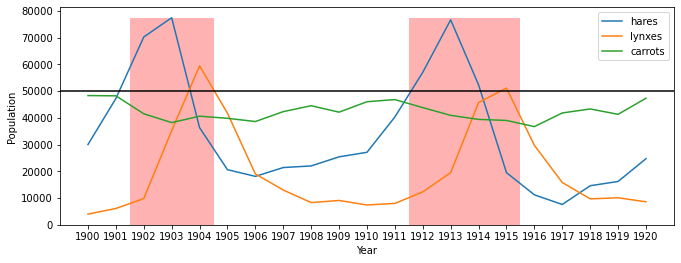

In [8]:
a=years[(hares>50000)+(lynxes>50000)+(carrots>50000)]
plt.figure().set_figwidth(11)
plt.plot(years, hares, label="hares")
plt.plot(years, lynxes, label="lynxes")
plt.plot(years, carrots, label="carrots")
plt.xticks(np.arange(years[0], years[-1]+1, step=1))
plt.axhline(50000, color="black")
plt.bar(a,max(np.max(hares),np.max(lynxes),np.max(carrots)),1,color="red",alpha=0.3)
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.show()

Find the top 2 years for each species when they had the lowest populations.

In [9]:
print("Top 2 years for hares when they had the lowest populations: "+str(years[np.argsort(hares)[:2]]))
print("Top 2 years for lynxes when they had the lowest populations: "+str(years[np.argsort(lynxes)[:2]]))
print("Top 2 years for carrots when they had the lowest populations: "+str(years[np.argsort(carrots)[:2]]))

Top 2 years for hares when they had the lowest populations: [1917 1916]
Top 2 years for lynxes when they had the lowest populations: [1900 1901]
Top 2 years for carrots when they had the lowest populations: [1916 1903]



Plot the change in hare population and the number of lynxes. Find the correlation coefficient.

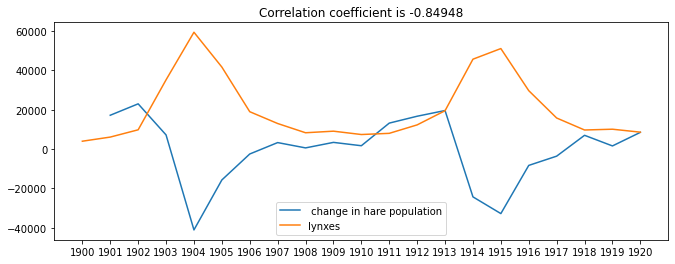

In [10]:
plt.figure().set_figwidth(11)
plt.plot(years[1:], hares[1:]-hares[:-1], label=" change in hare population")
plt.plot(years, lynxes, label="lynxes")
plt.xticks(np.arange(years[0], years[-1]+1, step=1))
plt.title("Correlation coefficient is "+format(np.corrcoef(lynxes[1:],hares[1:]-hares[:-1])[0,1], '0.5f'))
plt.legend()
plt.show()

Show population of hares vs carrots and hares vs lynxes.

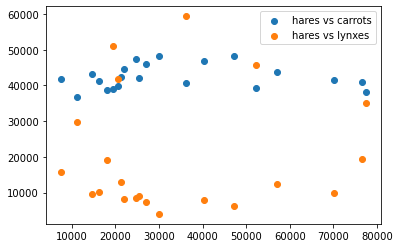

In [11]:
plt.scatter(hares,carrots,label="hares vs carrots")
plt.scatter(hares,lynxes,label="hares vs lynxes")
plt.legend()
plt.show()

Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value with the true value and print a ratio of the error to the true value.

In [12]:
print(hares[-2]-lynxes[-1]+np.mean(lynxes))
#-lynxes+np.mean(lynxes) is (very) roughly change in hares populations
print((hares[-2]-lynxes[-1]+np.mean(lynxes)-hares[-1])/hares[-1])

27766.666666666668
0.12415654520917684
